In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

In [3]:
# Load data
data = pd.read_csv('data/train.csv', parse_dates = ['Date'])
store = pd.read_csv('data/store.csv') 
print('training data loaded')

C:\Users\Hiroshi.Hiromax\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


training data loaded


In [4]:
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
# Only use stores that are open to train
data = data[data['Open'] != 0]

In [6]:
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [7]:
data = data.merge(store, on = 'Store', copy = False)

In [8]:
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [9]:
# Break down date column
data['year'] = data.Date.apply(lambda x: x.year)
data['month'] = data.Date.apply(lambda x: x.month)
#data['day'] = data.Date.apply(lambda x: x.day)
data['woy'] = data.Date.apply(lambda x: x.weekofyear)
data.drop(['Date'], axis = 1, inplace= True)

In [10]:
data.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,woy
0,1,5,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31
1,1,4,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31
2,1,3,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31
3,1,2,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31
4,1,1,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31


In [11]:
# Calculate time competition open time in months
data['CompetitionOpen'] = 12 * (data.year - data.CompetitionOpenSinceYear) + (data.month - data.CompetitionOpenSinceMonth)
data['CompetitionOpen'] = data.CompetitionOpen.apply(lambda x: x if x > 0 else 0)
data.drop(['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear'], axis = 1, inplace = True)

In [12]:
data.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,woy,CompetitionOpen
0,1,5,5263,555,1,1,0,1,c,a,1270.0,0,NaN,NaN,NaN,2015,7,31,82.0
1,1,4,5020,546,1,1,0,1,c,a,1270.0,0,NaN,NaN,NaN,2015,7,31,82.0
2,1,3,4782,523,1,1,0,1,c,a,1270.0,0,NaN,NaN,NaN,2015,7,31,82.0
3,1,2,5011,560,1,1,0,1,c,a,1270.0,0,NaN,NaN,NaN,2015,7,31,82.0
4,1,1,6102,612,1,1,0,1,c,a,1270.0,0,NaN,NaN,NaN,2015,7,31,82.0


In [13]:
# Promo open time in months
data['PromoOpen'] = 12 * (data.year - data.Promo2SinceYear) + (data.woy - data.Promo2SinceWeek) / float(4)
#data['PromoOpen'] = data.CompetitionOpen.apply(lambda x: x if x > 0 else 0)
data['PromoOpen'] = data.PromoOpen.apply(lambda x: x if x > 0 else 0)
data.drop(['Promo2SinceYear', 'Promo2SinceWeek'], axis = 1,inplace = True)

In [14]:
data.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,PromoInterval,year,month,woy,CompetitionOpen,PromoOpen
0,1,5,5263,555,1,1,0,1,c,a,1270.0,0,NaN,2015,7,31,82.0,0.0
1,1,4,5020,546,1,1,0,1,c,a,1270.0,0,NaN,2015,7,31,82.0,0.0
2,1,3,4782,523,1,1,0,1,c,a,1270.0,0,NaN,2015,7,31,82.0,0.0
3,1,2,5011,560,1,1,0,1,c,a,1270.0,0,NaN,2015,7,31,82.0,0.0
4,1,1,6102,612,1,1,0,1,c,a,1270.0,0,NaN,2015,7,31,82.0,0.0


In [15]:
# Get promo months
data['p_1'] = data.PromoInterval.apply(lambda x: x[:3] if type(x) == str else 0)
data['p_2'] = data.PromoInterval.apply(lambda x: x[4:7] if type(x) == str else 0)
data['p_3'] = data.PromoInterval.apply(lambda x: x[8:11] if type(x) == str else 0)
data['p_4'] = data.PromoInterval.apply(lambda x: x[12:15] if type(x) == str else 0)

In [16]:
data.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,PromoInterval,year,month,woy,CompetitionOpen,PromoOpen,p_1,p_2,p_3,p_4
0,1,5,5263,555,1,1,0,1,c,a,...,NaN,2015,7,31,82.0,0.0,0,0,0,0
1,1,4,5020,546,1,1,0,1,c,a,...,NaN,2015,7,31,82.0,0.0,0,0,0,0
2,1,3,4782,523,1,1,0,1,c,a,...,NaN,2015,7,31,82.0,0.0,0,0,0,0
3,1,2,5011,560,1,1,0,1,c,a,...,NaN,2015,7,31,82.0,0.0,0,0,0,0
4,1,1,6102,612,1,1,0,1,c,a,...,NaN,2015,7,31,82.0,0.0,0,0,0,0


In [17]:
# Get dummies for categoricals
data = pd.get_dummies(data, columns = ['p_1', 'p_2', 'p_3', 'p_4', 
                                       'StateHoliday' , 
                                       'StoreType', 
                                       'Assortment'])
data.drop(['Store',
           'PromoInterval', 
           'p_1_0', 'p_2_0', 'p_3_0', 'p_4_0', 
           'StateHoliday_0', 
           'year'], axis=1,inplace=True)

In [18]:
data.head()

,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,Promo2,month,woy,...,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,5,5263,555,1,1,1,1270.0,0,7,31,...,0,0,0,0,0,1,0,1,0,0
1,4,5020,546,1,1,1,1270.0,0,7,31,...,0,0,0,0,0,1,0,1,0,0
2,3,4782,523,1,1,1,1270.0,0,7,31,...,0,0,0,0,0,1,0,1,0,0
3,2,5011,560,1,1,1,1270.0,0,7,31,...,0,0,0,0,0,1,0,1,0,0
4,1,6102,612,1,1,1,1270.0,0,7,31,...,0,0,0,0,0,1,0,1,0,0


In [19]:
# Fill in missing values
data = data.fillna(0)
data = data.sort_index(axis=1)

In [20]:
data.head()

,Assortment_a,Assortment_b,Assortment_c,CompetitionDistance,CompetitionOpen,Customers,DayOfWeek,Open,Promo,Promo2,...,p_2_Apr,p_2_Jun,p_2_May,p_3_Aug,p_3_Jul,p_3_Sep,"p_4_,De",p_4_Nov,p_4_Oct,woy
0,1,0,0,1270.0,82.0,555,5,1,1,0,...,0,0,0,0,0,0,0,0,0,31
1,1,0,0,1270.0,82.0,546,4,1,1,0,...,0,0,0,0,0,0,0,0,0,31
2,1,0,0,1270.0,82.0,523,3,1,1,0,...,0,0,0,0,0,0,0,0,0,31
3,1,0,0,1270.0,82.0,560,2,1,1,0,...,0,0,0,0,0,0,0,0,0,31
4,1,0,0,1270.0,82.0,612,1,1,1,0,...,0,0,0,0,0,0,0,0,0,31


In [21]:
X_train = data.drop(['Sales', 'Customers'], axis = 1)
y_train = data.Sales

In [22]:
feature_cols = [col for col in X_train.columns]

In [23]:
X_train.head()

,Assortment_a,Assortment_b,Assortment_c,CompetitionDistance,CompetitionOpen,DayOfWeek,Open,Promo,Promo2,PromoOpen,...,p_2_Apr,p_2_Jun,p_2_May,p_3_Aug,p_3_Jul,p_3_Sep,"p_4_,De",p_4_Nov,p_4_Oct,woy
0,1,0,0,1270.0,82.0,5,1,1,0,0.0,...,0,0,0,0,0,0,0,0,0,31
1,1,0,0,1270.0,82.0,4,1,1,0,0.0,...,0,0,0,0,0,0,0,0,0,31
2,1,0,0,1270.0,82.0,3,1,1,0,0.0,...,0,0,0,0,0,0,0,0,0,31
3,1,0,0,1270.0,82.0,2,1,1,0,0.0,...,0,0,0,0,0,0,0,0,0,31
4,1,0,0,1270.0,82.0,1,1,1,0,0.0,...,0,0,0,0,0,0,0,0,0,31


In [24]:
y_train.head()

0    5263
1    5020
2    4782
3    5011
4    6102
Name: Sales, dtype: int64

In [25]:
# Fit random forest model
rf = RandomForestRegressor(n_jobs = -1, n_estimators = 15)
rf.fit(X_train, y_train)
print('model fit')

model fit


In [26]:
# Load and process test0 data
test = pd.read_csv('data/test0.csv', parse_dates = ['Date'])
test = process_data(test)

# Ensure same columns in test data as training
for col in data.columns:
    if col not in test.columns:
        test[col] = np.zeros(test.shape[0])
        
test = test.sort_index(axis=1).set_index('Id')
print('test data loaded and processed')

# Make predictions
X_test = test.drop(['Sales', 'Customers'], axis=1).values
y_test = rf.predict(X_test)

# Make Submission
result = pd.DataFrame({'Id': test.index.values, 'Sales0': y_test}).set_index('Id')
result = result.sort_index()
result.to_csv('result_test0.csv')
print('submission created')

test data loaded and processed
submission created


In [27]:
# Load and process test1 data
test = pd.read_csv('data/test1.csv', parse_dates = ['Date'])
test = process_data(test)

# Ensure same columns in test data as training
for col in data.columns:
    if col not in test.columns:
        test[col] = np.zeros(test.shape[0])
        
test = test.sort_index(axis=1).set_index('Id')
print('test data loaded and processed')

# Make predictions
X_test = test.drop(['Sales', 'Customers'], axis=1).values
y_test = rf.predict(X_test)

# Make Submission
result = pd.DataFrame({'Id': test.index.values, 'Sales1': y_test}).set_index('Id')
result = result.sort_index()
result.to_csv('result_test1.csv')
print('submission created')

test data loaded and processed
submission created


In [1]:
def process_data(data):
	'''
	Processes data for model
		INPUT: DataFrame
		OUTPUT: DataFrame
	'''
	# Merge store data
	data = data.merge(store, on = 'Store', copy = False)

	# Break down date column
	data['year'] = data.Date.apply(lambda x: x.year)
	data['month'] = data.Date.apply(lambda x: x.month)
	#     data['dow'] = data.Date.apply(lambda x: x.dayofweek)
	data['woy'] = data.Date.apply(lambda x: x.weekofyear)
	data.drop(['Date'], axis = 1, inplace= True)

	# Calculate time competition open time in months
	data['CompetitionOpen'] = 12 * (data.year - data.CompetitionOpenSinceYear) + \
	(data.month - data.CompetitionOpenSinceMonth)
	data['CompetitionOpen'] = data.CompetitionOpen.apply(lambda x: x if x > 0 else 0)
	data.drop(['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear'], axis = 1, 
	         inplace = True)

	# Promo open time in months
	data['PromoOpen'] = 12 * (data.year - data.Promo2SinceYear) + \
	(data.woy - data.Promo2SinceWeek) / float(4)
	data['PromoOpen'] = data.CompetitionOpen.apply(lambda x: x if x > 0 else 0)
	data.drop(['Promo2SinceYear', 'Promo2SinceWeek'], axis = 1, 
	         inplace = True)

	# Get promo months
	data['p_1'] = data.PromoInterval.apply(lambda x: x[:3] if type(x) == str else 0)
	data['p_2'] = data.PromoInterval.apply(lambda x: x[4:7] if type(x) == str else 0)
	data['p_3'] = data.PromoInterval.apply(lambda x: x[8:11] if type(x) == str else 0)
	data['p_4'] = data.PromoInterval.apply(lambda x: x[12:15] if type(x) == str else 0)


	# Get dummies for categoricals
	data = pd.get_dummies(data, columns = ['p_1', 'p_2', 'p_3', 'p_4', 
	                                       'StateHoliday' , 
	                                       'StoreType', 
	                                       'Assortment'])
	data.drop(['Store',
	           'PromoInterval', 
	           'p_1_0', 'p_2_0', 'p_3_0', 'p_4_0', 
	           'StateHoliday_0', 
	           'year'], axis=1,inplace=True)


	# Fill in missing values
	data = data.fillna(0)
	data = data.sort_index(axis=1)

	return data


In [28]:
result1 = pd.read_csv('data/result_test1.csv')
result0 = pd.read_csv('data/result_test0.csv')
df_result1 = pd.DataFrame(result1)
df_result0 = pd.DataFrame(result0)
#pd.concat([df_result1,df_result0], axis=1)
result_temp = pd.merge(df_result1,df_result0, on='Id')
#result_temp = result1.merge(result0)
test = pd.read_csv('data/test.csv') 
result = result_temp.merge(test, on = 'Id', copy = False)
result['SalesPromo'] = result['Sales1'] - result['Sales0']

In [29]:
result.head()

,Id,Sales1,Sales0,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,SalesPromo
0,1,4599.533333,4739.000000,1,4,2015-09-17,1.0,1,0,0,-139.466667
1,2,7784.400000,5716.733333,3,4,2015-09-17,1.0,1,0,0,2067.666667
2,3,10343.333333,7269.600000,7,4,2015-09-17,1.0,1,0,0,3073.733333
3,4,8448.266667,4899.333333,8,4,2015-09-17,1.0,1,0,0,3548.933333
4,5,7741.800000,6449.066667,9,4,2015-09-17,1.0,1,0,0,1292.733333


In [30]:
result_groupby = result.groupby("Store",as_index=False)

In [31]:
result_sum = result_groupby.sum()

In [32]:
Cost = pd.read_csv('data/promo_cost.csv')
result_sum = pd.merge(result_sum, Cost, on='Store')
result_sum['PromoEffect'] = result_sum['SalesPromo'] - result_sum['Cost']

In [33]:
result_sum.head()

,Store,Id,Sales1,Sales0,DayOfWeek,Open,Promo,SchoolHoliday,SalesPromo,Cost,PromoEffect
0,1,965616,243440.200000,215437.133333,191,41.0,19,35,28003.066667,41192,-13188.933333
1,3,965664,391058.933333,248569.866667,191,41.0,19,7,142489.066667,65185,77304.066667
2,7,965712,565023.266667,360387.000000,191,41.0,19,20,204636.266667,68277,136359.266667
3,8,965760,371374.333333,242098.133333,191,41.0,19,20,129276.200000,62375,66901.200000
4,9,965808,398341.466667,277642.600000,191,41.0,19,7,120698.866667,49110,71588.866667


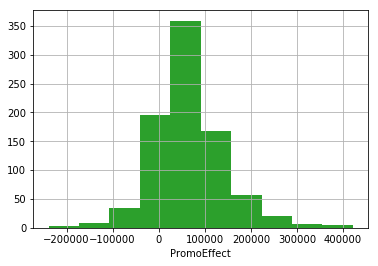

In [36]:
result_sum['PromoEffect'].hist()
plt.xlabel('PromoEffect')
plt.show()

In [37]:
result_sum['PromoEffect'].mean()

64341.29269554401

In [38]:
store = pd.read_csv('data/store.csv') 
result_sum = pd.merge(result_sum, store, on='Store')

In [39]:
result_sum.head()

,Store,Id,Sales1,Sales0,DayOfWeek,Open,Promo,SchoolHoliday,SalesPromo,Cost,PromoEffect,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,965616,243440.200000,215437.133333,191,41.0,19,35,28003.066667,41192,-13188.933333,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,3,965664,391058.933333,248569.866667,191,41.0,19,7,142489.066667,65185,77304.066667,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,7,965712,565023.266667,360387.000000,191,41.0,19,20,204636.266667,68277,136359.266667,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,8,965760,371374.333333,242098.133333,191,41.0,19,20,129276.200000,62375,66901.200000,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,9,965808,398341.466667,277642.600000,191,41.0,19,7,120698.866667,49110,71588.866667,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN


In [40]:
Grouped_Stype = result_sum['PromoEffect'].groupby(result_sum['StoreType'])
Mean_Stype = Grouped_Stype.mean()

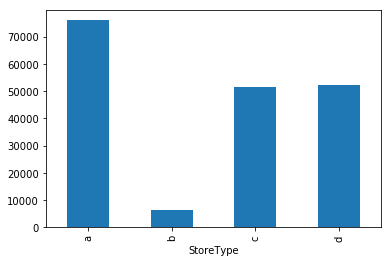

In [41]:
Mean_Stype.plot(kind='bar')
plt.show()

In [42]:
Grouped_Assort = result_sum['PromoEffect'].groupby(result_sum['Assortment'])
Mean_Assort = Grouped_Assort.mean()

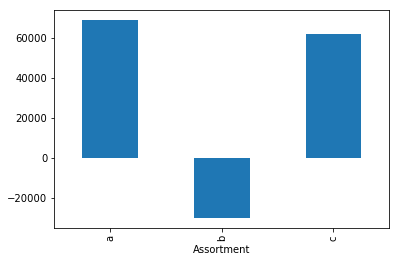

In [43]:
Mean_Assort.plot(kind='bar')
plt.show()

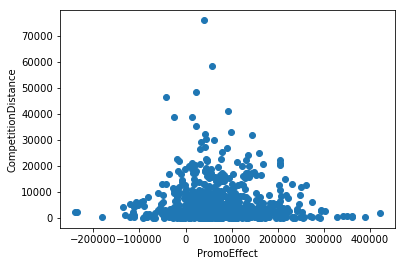

In [44]:
plt.scatter(result_sum['PromoEffect'], result_sum['CompetitionDistance'])
plt.xlabel('PromoEffect')
plt.ylabel('CompetitionDistance')
plt.show()

In [50]:
result_Promo = result_sum[result_sum['PromoEffect']>300000]
result_Promo[['Store','PromoEffect','StoreType','Assortment']]

,Store,PromoEffect,StoreType,Assortment
28,39,389123.533333,a,a
334,432,342305.866667,a,a
354,459,327908.533333,a,a
391,511,421330.866667,a,a
594,768,302922.866667,a,c
640,831,360544.866667,a,a
747,966,350206.933333,a,a
837,1092,360920.400000,a,a


In [51]:
result_Promo['PromoEffect'].sum()

2855263.866666666

In [46]:
StoreType_a = result_sum['PromoEffect'][result_sum['StoreType']=='a']
StoreType_a.head()

1     77304.066667
2    136359.266667
3     66901.200000
4     71588.866667
5     93891.666667
Name: PromoEffect, dtype: float64

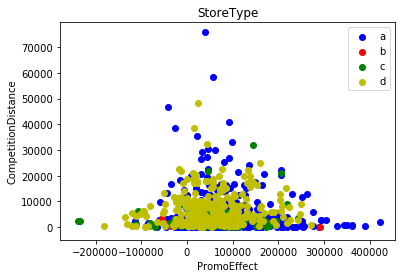

In [47]:
StoreType_a = result_sum['PromoEffect'][result_sum['StoreType']=='a']
StoreType_b = result_sum['PromoEffect'][result_sum['StoreType']=='b']
StoreType_c = result_sum['PromoEffect'][result_sum['StoreType']=='c']
StoreType_d = result_sum['PromoEffect'][result_sum['StoreType']=='d']
Distance_a = result_sum['CompetitionDistance'][result_sum['StoreType']=='a']
Distance_b = result_sum['CompetitionDistance'][result_sum['StoreType']=='b']
Distance_c = result_sum['CompetitionDistance'][result_sum['StoreType']=='c']
Distance_d = result_sum['CompetitionDistance'][result_sum['StoreType']=='d']
 
plt.scatter(StoreType_a, Distance_a,   c='b', label = 'a')
plt.scatter(StoreType_b, Distance_b,   c='r', label = 'b')
plt.scatter(StoreType_c, Distance_c,   c='g', label = 'c')
plt.scatter(StoreType_d, Distance_d,   c='y', label = 'd')
plt.legend()
plt.xlabel('PromoEffect')
plt.ylabel('CompetitionDistance')
plt.title("StoreType")
plt.show()

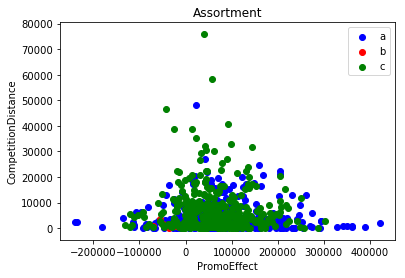

In [48]:
Assortment_a = result_sum['PromoEffect'][result_sum['Assortment']=='a']
Assortment_b = result_sum['PromoEffect'][result_sum['Assortment']=='b']
Assortment_c = result_sum['PromoEffect'][result_sum['Assortment']=='c']
Distance_a = result_sum['CompetitionDistance'][result_sum['Assortment']=='a']
Distance_b = result_sum['CompetitionDistance'][result_sum['Assortment']=='b']
Distance_c = result_sum['CompetitionDistance'][result_sum['Assortment']=='c']
 
plt.scatter(Assortment_a, Distance_a,   c='b', label = 'a')
plt.scatter(Assortment_b, Distance_b,   c='r', label = 'b')
plt.scatter(Assortment_c, Distance_c,   c='g', label = 'c')

plt.legend()
plt.xlabel('PromoEffect')
plt.ylabel('CompetitionDistance')
plt.title("Assortment")
plt.show()